In [44]:
#Final Model: Singular Value Decomposition 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [45]:
discussions_df = pd.read_csv('Discussions.csv', header=0, encoding='utf-8')
ratings_df = pd.read_csv('Ratings.csv', header=0, encoding='utf-8')
display(discussions_df)
display(ratings_df)

,DiscussionID,AlbumName,ArtistName,Date,AvgRating,Stdev,Attendance,RotationGenre,OtherGenre,Subgenres,ReleaseYear,FavoriteTrack,Popularity,Tracks,SpotifyID,Image
0,1.0,IGOR,"Tyler, the Creator",2022-02-19,0.00,0.00,0.0,NaN,False,"Neo-Soul, Psychedelic Soul",2019.0,NaN,85.0,12.0,5zi7WsKlIiUXv09tbGLKsE,https://i.scdn.co/image/ab67616d0000b273700588...
1,2.0,The New Abnormal,The Strokes,2022-02-26,0.00,0.00,0.0,NaN,False,Indie Rock,2020.0,NaN,76.0,9.0,2xkZV2Hl1Omi8rk2D7t5lN,https://i.scdn.co/image/ab67616d0000b273bfa99a...
2,3.0,Blonde,Frank Ocean,2022-03-06,0.00,0.00,0.0,NaN,False,"Alternative R&B, Art Pop, Neo-Soul",2016.0,NaN,86.0,17.0,3mH6qwIy9crq0I9YQbOuDf,https://i.scdn.co/image/ab67616d0000b273c5649a...
3,4.0,So Tonight that I Might See,Mazzy Star,2022-03-27,0.00,0.00,0.0,NaN,False,"Dream Pop, Neo-Psychedelia",1993.0,NaN,73.0,10.0,5K18gTgac0q6Jma5HkV1vA,https://i.scdn.co/image/ab67616d0000b27389a392...
4,5.0,A New World Record,Electric Light Orchestra,2022-04-03,0.00,0.00,0.0,NaN,False,"Symphonic Rock, Pop Rock, Progressive Pop",1976.0,NaN,67.0,9.0,7a35UzxXYuKQGMGImyB0Un,https://i.scdn.co/image/ab67616d0000b273ee5b10...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,67.0,Titanic Rising,Weyes Blood,2024-02-05,8.20,1.50,55.0,Pop,False,"Baroque Pop, Art Pop, Progressive Pop, Singer-...",2019.0,Andromeda,68.0,10.0,0Cuqhgy8vm96JEkBY3polk,https://i.scdn.co/image/ab67616d00001e020c64e7...
67,68.0,Because the Internet,Childish Gambino,2024-02-12,6.88,1.93,42.0,Hip-Hop,False,"Abstract Hip Hop, West Coast Hip Hop, Contempo...",2013.0,3005,81.0,19.0,62yjWIhnATHxPqGbgC9Lqr,https://i.scdn.co/image/ab67616d00001e0226d64b...
68,69.0,The Four Seasons,Antonio Vivaldi,2024-02-19,8.08,1.25,38.0,Classical,True,"Baroque Music, Concerto",1985.0,Winter: I. Allegro non molto,63.0,12.0,4eEJooUkzenp7lZTtfbIP7,https://i.scdn.co/image/ab67616d00001e02c7464f...
69,70.0,House Of Balloons (Original),The Weeknd,2024-02-26,8.04,1.08,30.0,Mainstream,True,"Alternative R&B, Downtempo",2011.0,House Of Balloons / Glass Table Girls,83.0,9.0,7zCODUHkfuRxsUjtuzNqbd,https://i.scdn.co/image/ab67616d00001e02274b40...


,MemberID,DiscussionID,Rating,FavoriteTrack1,FavoriteTrack2,FavoriteTrack3
0,88,1,7,NaN,NaN,NaN
1,59,2,8,NaN,NaN,NaN
2,88,3,9,NaN,NaN,NaN
3,294,3,10,NaN,NaN,NaN
4,201,3,7,NaN,NaN,NaN
...,...,...,...,...,...,...
1707,313,69,8,"Vivaldi: The Four Seasons, Violin Concerto in ...","Vivaldi: The Four Seasons, Violin Concerto in ...","Vivaldi: The Four Seasons, Violin Concerto in ..."
1708,165,69,7,NaN,NaN,NaN
1709,131,69,8,"Vivaldi: The Four Seasons, Violin Concerto in ...","Vivaldi: The Four Seasons, Violin Concerto in ...","Vivaldi: The Four Seasons, Violin Concerto in ..."
1710,286,69,7,"Vivaldi: The Four Seasons, Violin Concerto in ...","Vivaldi: The Four Seasons, Violin Concerto in ...","Vivaldi: The Four Seasons, Violin Concerto in ..."


In [46]:
X = ratings_df.drop(columns=['Rating'])
y = ratings_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train['Rating'] = y_train

pivot_df = X_train.pivot(index='MemberID', columns='DiscussionID', values='Rating')
pivot_df = pivot_df.fillna(0)
display(pivot_df)

DiscussionID,1,2,3,4,5,6,7,8,9,10,...,60,61,62,63,64,65,66,67,68,69
MemberID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,9.0,0.0,8.0,0.0,7.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,6.0,5.0,4.0,8.0,0.0,7.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,0.0,0.0
337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0


In [63]:
from scipy.linalg import svd
eigenvalues = 5
def do_svd(mat, k=0, option=False):
    U, Sigma, VT = svd(mat)
    U = pd.DataFrame(U[:,:k])
    VT = pd.DataFrame(VT[:k,:])
    if option:
        return Sigma
    else:
        return U, VT

In [64]:
U = do_svd(pivot_df, eigenvalues)[0]
U

,0,1,2,3,4
0,-0.224690,-0.009933,0.191225,-0.093004,0.122048
1,-0.003786,-0.015375,0.032491,-0.003515,-0.031796
2,-0.019664,-0.062866,0.072039,-0.028021,-0.052016
3,-0.204095,0.032137,0.015859,0.073298,0.022592
4,-0.028218,-0.046044,0.028365,0.021521,-0.061719
...,...,...,...,...,...
238,-0.016385,0.031537,-0.015291,-0.068928,-0.072349
239,-0.005564,0.019423,-0.007108,-0.045427,-0.048524
240,-0.004946,0.017265,-0.006318,-0.040379,-0.043133
241,-0.007720,0.017146,-0.017471,-0.034827,-0.050433


In [65]:
VT = do_svd(pivot_df, eigenvalues)[1]
VT.T

,0,1,2,3,4
0,-0.007315,0.002773,0.007588,-0.031100,0.022535
1,-0.016618,-0.017113,0.017812,-0.029709,0.044589
2,-0.019882,0.025443,0.031055,-0.065637,0.048386
3,-0.007315,0.002773,0.007588,-0.031100,0.022535
4,-0.029326,-0.021456,0.040770,-0.051561,0.028996
...,...,...,...,...,...
63,-0.081125,0.086090,-0.092618,-0.012535,-0.198081
64,-0.185431,0.143738,0.044099,-0.254169,-0.124880
65,-0.162272,0.176912,-0.141251,-0.260506,-0.366954
66,-0.090966,0.155869,-0.044698,-0.264283,-0.274607


In [66]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("seaborn")


def plot_data(mat, data_type, camera=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    if camera != None:
        ax.view_init(elev=camera[0], azim=camera[1])
    for index, row in mat.iterrows():
        ax.scatter(row[0], row[1], row[2], alpha=0.8)
        ax.text(row[0], row[1], row[2],'{0} {1}'.format(data_type, index), size=10)
    plt.show()

C:\Users\athar\AppData\Local\Temp\ipykernel_14788\4149861207.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


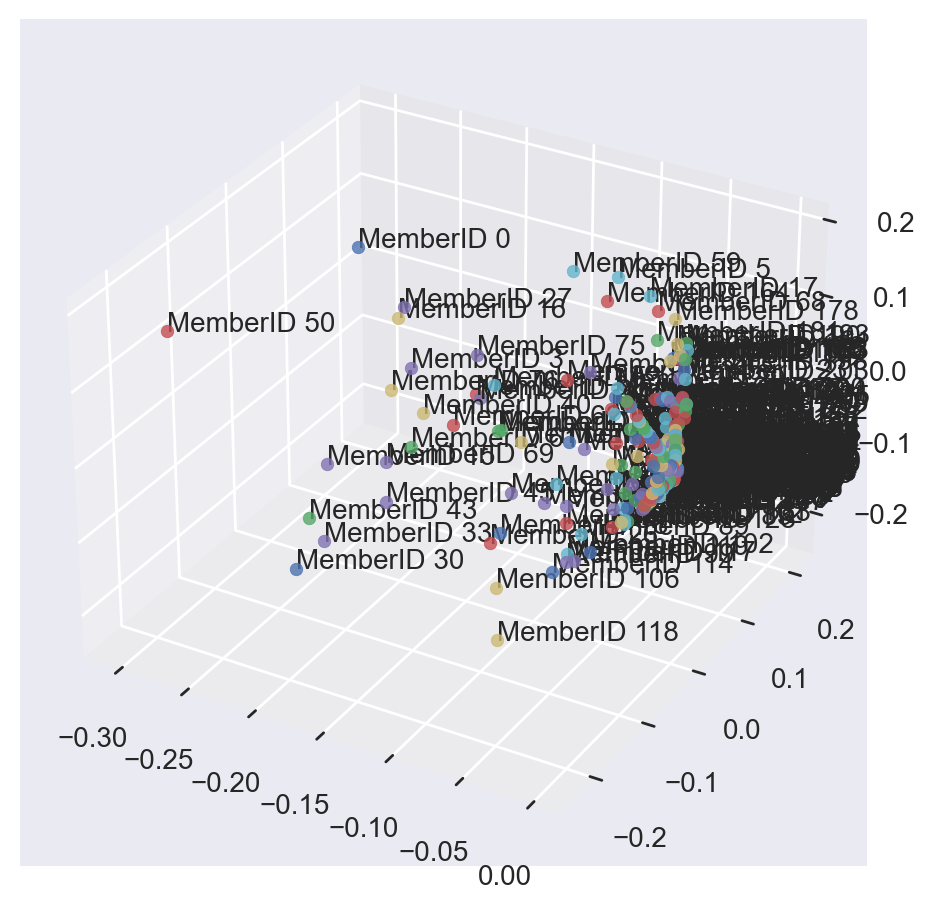

In [68]:
plot_data(U, "MemberID")

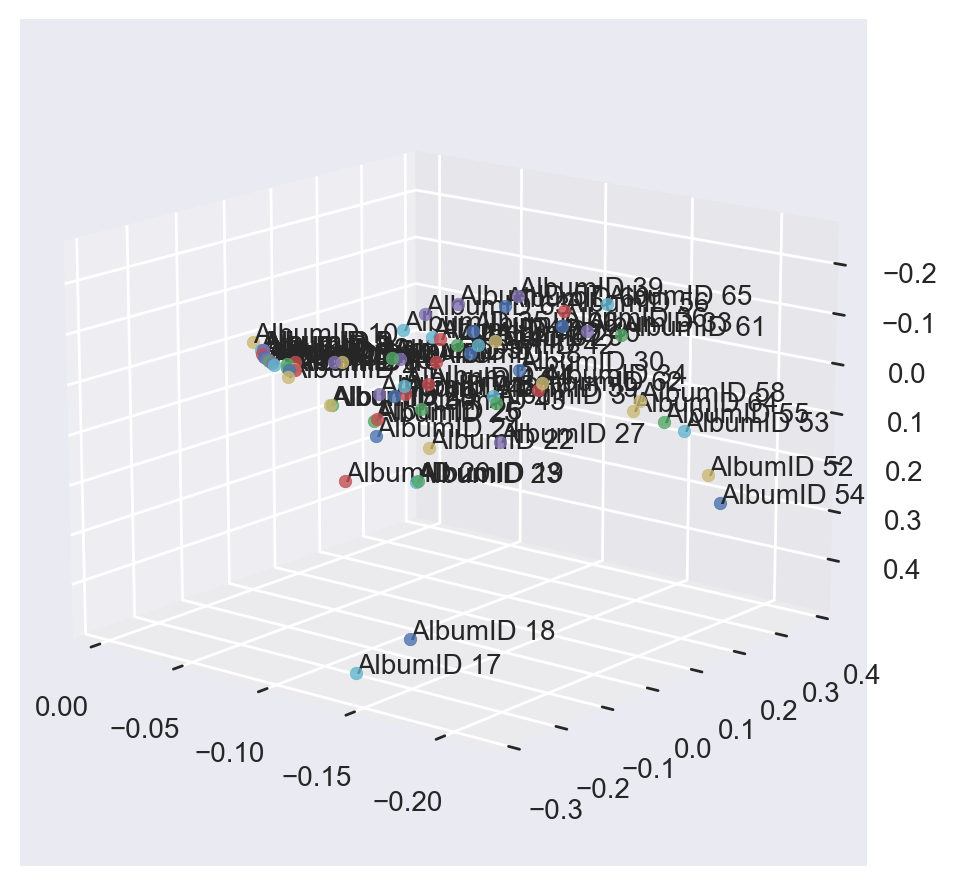

In [69]:
plot_data(VT.T, "AlbumID", [-164.5, 51.25])

In [113]:
def recommend(liked_movie, VT, output_num=2):
    global rec
    rec = []
    for item in range(len(VT.columns)):
        if item != liked_movie:
            rec.append([item,np.dot(VT[item],VT[liked_movie])])
    final_rec = [i for i in sorted(rec, key=lambda x: x[1],reverse=True)]
    return final_rec[:output_num]

In [156]:
top_2_rated_albums = recommend(67, VT)
pivot_df[67]

MemberID
1       0.0
3       0.0
5       0.0
6       0.0
7       0.0
       ... 
336     8.0
337     0.0
338     0.0
340     7.0
341    10.0
Name: 67, Length: 243, dtype: float64

In [87]:
y_pred = []

X = ratings_df.drop(columns=['Rating'])
y = ratings_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train['Rating'] = y_train

pivot_df = X_train.pivot(index='MemberID', columns='DiscussionID', values='Rating')
pivot_df = pivot_df.fillna(0)
#print(ind)
X_test

,MemberID,DiscussionID,FavoriteTrack1,FavoriteTrack2,FavoriteTrack3
651,158,35,O Green World,Feel Good Inc.,Demon Days
1124,8,54,Fascination Street,Prayers for Rain,Disintegration
1647,313,67,A Lot's Gonna Change,Picture Me Better,Andromeda
405,49,29,Tiny Vessels,NaN,NaN
534,92,32,Cherry-coloured Funk,NaN,NaN
...,...,...,...,...,...
155,18,20,Bad Religion,NaN,NaN
1285,88,58,Drew Barrymore,Normal Girl,Garden (Say It Like Dat)
1324,277,58,Prom,The Weekend,Doves In The Wind
1037,35,52,Walking in the Rhythm,Smilin Days Summer Holiday,Yurameki in the Air


In [153]:
for idx, row in X_test.iterrows():
    user = row['MemberID']
    album = row['DiscussionID']-2
    if user in pivot_df.index:
        top_2_rated_albums_and_sims = recommend(album, VT)
    top2_rated_albums = []
    top2_sims = []
    for album, sim in top_2_rated_albums_and_sims:
        print(album, sim)
        try:
            top2_rated_albums.append(album)
            top2_sims.append(sim)
            normalized_top2_sims = top2_sims
        except KeyError:
    # # Handle the case where a KeyError occur
             print(f"User {user} or album {album} does not exist in pivot_df.")
    
    print(top2_rated_albums)
    pred_r = 0
    ind = 0
    # # predict the rating with the weighted avg
    for a in top2_rated_albums:
            pred_r += top2_sims[ind] * pivot_df[a][user]
            ind += 1

    y_pred= np.append(y_pred, int(np.round(pred_r,0)))
    
# y_pred = np.array(y_pred)
# rmse = np.sqrt(np.mean((y_pred - y_test)**2))
# print("RMSE:", rmse)

36 0.10135129309497787
39 0.09286624820737785
[36, 39]
54 0.2092719675470231
55 0.16048926988983364
[54, 55]
66 0.21826559915806787
64 0.16132796169222352
[66, 64]
52 0.09115251458281337
19 0.0685088649168635
[52, 19]
36 0.11680280097632784
40 0.11061469756102049
[36, 40]
64 0.10559037896577085
62 0.08901454586421344
[64, 62]
52 0.16048926988983364
54 0.12438995669223923
[52, 54]
52 0.03161603173400117
27 0.029069096389116533
[52, 27]
40 0.07770316381481784
30 0.06431668987601383
[40, 30]
40 0.07770316381481784
30 0.06431668987601383
[40, 30]


KeyError: 193

In [150]:
pivot_df

DiscussionID,1,2,3,4,5,6,7,8,9,10,...,60,61,62,63,64,65,66,67,68,69
MemberID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,9.0,0.0,8.0,0.0,7.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,6.0,5.0,4.0,8.0,0.0,7.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,0.0,0.0
337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0


In [116]:
for idx, row in X_test.iterrows():
    user = row['MemberID']-1
    album = row['DiscussionID']-2
    
    try:
        top_2_rated_albums_and_sims = recommend(album, VT)
    except KeyError:
    # Handle the case where a KeyError occur
       print(f"User {user} or album {album} does not exist in pivot_df.")


In [ ]:
for idx, row in X_test.iterrows():
    user = row['MemberID']
    album = row['DiscussionID']
    user_sims = {}
    
    if album not in pivot_df.columns:
        y_pred.append(int(np.round(X_train['Rating'].mean(),0)))
        continue
    if user not in pivot_df.index:
        y_pred.append(int(np.round(X_train['Rating'].mean(),0)))
        continue

    for album_id in pivot_df.columns:
        if album_id != album:
            album_sims[album_id] = cosine_similarity(pivot_df[album], pivot_df[album_id])

    rated_albums = []
    for i in pivot_df.columns:
        if pivot_df[i][user] != 0 and i != album:
            rated_albums.append(i)
    rated_album_sims = []
    for a in rated_albums:
        rated_album_sims.append(album_sims[a])

    top5_rated_albums = []
    top5_sims = []
    sorted_pairs = sorted(zip(rated_albums, rated_album_sims), key=lambda x: x[1], reverse=True)
    for top5_album, sim in sorted_pairs[:5]:
        top5_rated_albums.append(top5_album)
        top5_sims.append(sim)
    normalized_top5_sims = top5_sims / sum(top5_sims)

    pred_r = 0
    ind = 0
    # # predict the rating with the weighted avg
    for a in top5_rated_albums:
        pred_r += normalized_top5_sims[ind] * pivot_df[a][user]
        ind += 1

    y_pred.append(int(np.round(pred_r,0)))
    
y_pred = np.array(y_pred)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print("RMSE:", rmse)